In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
import yfinance as yf
data = yf.download("VALE3.SA",period='1y',auto_adjust=True)
data['return'] = data['Close'].pct_change()
data=data.dropna()

[*********************100%%**********************]  1 of 1 completed


In [32]:
x=data[['Open','High','Low','Volume']]
y=data['Close']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0) 
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [33]:
mean_squared_error(y_test,predictions)

0.07759057943225281

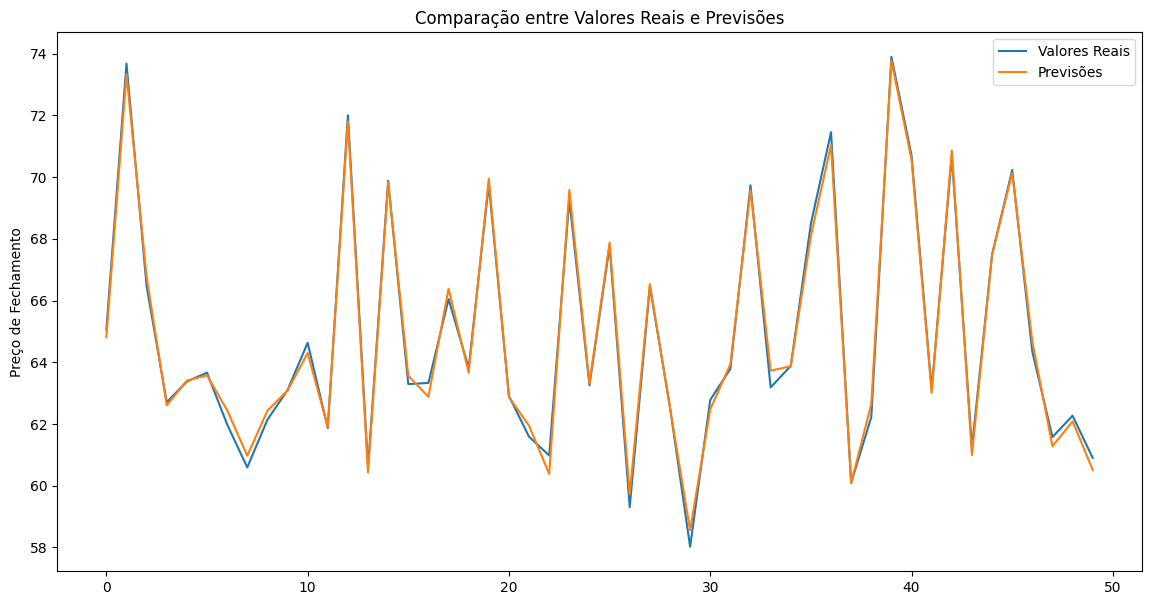

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(predictions, label='Previsões')
plt.ylabel('Preço de Fechamento')
plt.title('Comparação entre Valores Reais e Previsões')
plt.legend()
plt.show()